In [0]:
import numpy as np
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Input, add
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import os
from google.colab import files
import zipfile
from Simple_Models import Simple_CNN
import warnings

**IMPORTANT: Here you need in insert a cell with the following:**

files.upload()

**You then need to upload your kaggle api json file, that you can get from your kaggle profile**

In [5]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d paultimothymooney/breast-histopathology-images --force

 99% 1.48G/1.49G [00:35<00:00, 47.6MB/s]
100% 1.49G/1.49G [00:35<00:00, 45.2MB/s]


In [0]:
! mkdir 'Pictures'
! mkdir 'Train'
! mkdir 'Val'
! mkdir 'Test'
! mkdir 'Train/0'
! mkdir 'Train/1'
! mkdir 'Test/0'
! mkdir 'Test/1'
! mkdir 'Val/0'
! mkdir 'Val/1'

In [0]:
zip = zipfile.ZipFile('/content/breast-histopathology-images.zip', 'r')
zip.extractall('/content')
zip.close()

In [0]:
zip2 = zipfile.ZipFile('/content/IDC_regular_ps50_idx5.zip', 'r')
zip2.extractall('/Pictures/')
zip2.close()

In [0]:
#setting random seed
np.random.seed(15)

#numbers from kaggle, will be used to rebalance data
num_neg = 198738
num_pos = 78786

ratio = num_pos/num_neg

#going through each folder
for folder in os.listdir('/Pictures'):
    #going through each file that in this folder in class 0
    for file in os.listdir('/Pictures/' + folder + '/0'):
        
        #will only add points under certain criteria to rebalance data
        rand_undersample = np.random.uniform(0, 1)
        #checking random ratio
        if rand_undersample < ratio:
            
            rand = np.random.uniform(0, 1)
            #adding to training with 0.6 chance
            if rand > 0.4:
                shutil.copy(src = '/Pictures/' + folder + '/0/' + file, dst = 'Train/0')
        
            #adding to validation with 0.2 chance
            elif rand < 0.2:
                shutil.copy(src = '/Pictures/' + folder + '/0/' + file, dst = 'Val/0')
        
            #adding to test with 0.2 chance
            else:
                shutil.copy(src = '/Pictures/' + folder + '/0/' + file, dst = 'Test/0')
                
    #going through each file that in this folder in class 1
    for file in os.listdir('/Pictures/' + folder + '/1'):
        #adding to training with 0.6 chance
        rand = np.random.uniform(0, 1)
        if rand > 0.4:
            shutil.copy(src = '/Pictures/' + folder + '/1/' + file, dst = 'Train/1')
        
        #adding to validation with 0.2 chance
        elif rand < 0.2:
            shutil.copy(src = '/Pictures/' + folder + '/1/' + file, dst = 'Val/1')
        
        #adding to test with 0.2 chance
        else:
            shutil.copy(src = '/Pictures/' + folder + '/1/' + file, dst = 'Test/1')

In [10]:
#defining datagen
datagen = ImageDataGenerator()

#defining test/train datagen
test_datagen = ImageDataGenerator()


#defining generators
train_generator = datagen.flow_from_directory(
        directory = 'Train',
        target_size=(50, 50),
        batch_size=32,
        class_mode='binary',
        shuffle = True)


validation_generator = test_datagen.flow_from_directory(
        directory = 'Val',
        target_size=(50, 50),
        batch_size=32,
        class_mode='binary',
        shuffle = True)

Found 94872 images belonging to 2 classes.
Found 31494 images belonging to 2 classes.


**We have now successfully imported all of our data from Kaggle and are ready to start bringing in our models and training.**

Note that because I wanted the majority of this notebook to be focused on looking at the results of the different models, all of the models have been definited in other python scripts. Please go to those files in order to get details on the exact architecture of the files. I will provide a short description of the architecture in the text above a model, but for details please look in the Simple_Models.py or Complex_Models.py python files.

In [22]:
warnings.filterwarnings("ignore")

simpleCNN = Simple_CNN(1,(50, 50, 3),(3, 3),'softmax')
simplePerceptron = perceptron(128,1,(50, 50, 3),0.01,'softmax')
simple_Dense = simple_Dense(128,1,(50, 50, 3),0.01,'softmax')

warnings.filterwarnings("default")









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history_cnn = simpleCNN.fit_generator(train_generator,
        steps_per_epoch=2000,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800, verbose=0)

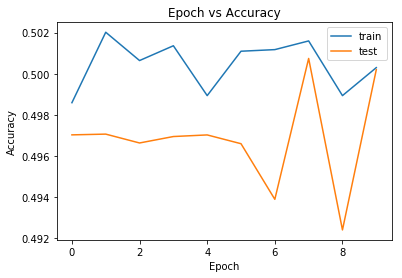

In [26]:
df = pd.DataFrame(data = history_cnn.history)
plt.plot(df.acc)
plt.plot(df.val_acc)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Epoch vs Accuracy")
_ = plt.legend(['train', 'test'], loc='best')